In [1]:
# Data cleaning and EDA modules

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
# from sklearn.tree import export_graphviz  


# Estimation model modules

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import  SVR                            # support vector machine


# Model validation modules

from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, cross_val_score



# model metrics modules

from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_squared_error 

#Pipeline and grid search modules

from sklearn.model_selection import GridSearchCV


print('finished importing modules')

finished importing modules


In [2]:
df = pd.read_csv('../../timmy-data/loans_cleaned.csv')

In [3]:
df.head(5)

,loan_id,status,posted_time,raised_time,loan_amount,activity_name,sector_name,country_name,lender_term,repayment_interval,borrower_genders,time_to_fund,hours_to_fund,loan_year,day_posted,image_incl,video_incl
0,372964,funded,2011-12-20 06:04:56+00:00,2012-01-02 09:01:26+00:00,175.0,General Store,Retail,Philippines,8.0,monthly,F,13 days 02:56:30.000000000,315,2011,Tuesday,1,0
1,1037234,funded,2016-03-11 11:24:20+00:00,2016-04-12 23:29:40+00:00,400.0,Retail,Retail,Pakistan,13.0,monthly,F,32 days 12:05:20.000000000,781,2016,Friday,1,0
2,1037493,funded,2016-03-11 22:00:46+00:00,2016-03-24 08:31:37+00:00,3400.0,Butcher Shop,Food,Bolivia,10.0,monthly,G,12 days 10:30:51.000000000,299,2016,Friday,1,0
3,1800053,funded,2019-07-17 05:42:15+00:00,2019-07-19 13:01:53+00:00,150.0,Fish Selling,Food,Philippines,8.0,monthly,F,2 days 07:19:38.000000000,56,2019,Wednesday,1,0
4,542923,funded,2013-03-26 15:15:18+00:00,2013-03-28 01:46:04+00:00,775.0,Food Production/Sales,Food,Guatemala,8.0,monthly,G,1 days 10:30:46.000000000,35,2013,Tuesday,1,0


In [4]:
df.isnull().sum()

loan_id               0
status                0
posted_time           0
raised_time           0
loan_amount           0
activity_name         0
sector_name           0
country_name          0
lender_term           0
repayment_interval    0
borrower_genders      0
time_to_fund          0
hours_to_fund         0
loan_year             0
day_posted            0
image_incl            0
video_incl            0
dtype: int64

### Log transform loan amount and hours to fund

In [5]:
df['log_amount'] = np.log(df['loan_amount'])
df['log_htf'] = np.log(df['hours_to_fund'])
df.isnull().sum()

loan_id               0
status                0
posted_time           0
raised_time           0
loan_amount           0
activity_name         0
sector_name           0
country_name          0
lender_term           0
repayment_interval    0
borrower_genders      0
time_to_fund          0
hours_to_fund         0
loan_year             0
day_posted            0
image_incl            0
video_incl            0
log_amount            0
log_htf               0
dtype: int64

### Dummify categorical variables - activity, country, and gender

In [6]:
df = pd.get_dummies(columns=["activity_name"], drop_first=True, data=df)
df = pd.get_dummies(columns=["country_name"], drop_first=True, data=df)
df = pd.get_dummies(columns=['borrower_genders'], drop_first=True, data=df)

In [7]:
df_1=df.drop(columns=['image_incl', 'video_incl', 'sector_name', 'loan_id', 'status',  
                      'day_posted','posted_time', 'raised_time', 'image_incl', 'video_incl', 
                      'lender_term', 'repayment_interval']).copy()

In [8]:
df_1.shape
features=df_1.columns
features

Index(['loan_amount', 'time_to_fund', 'hours_to_fund', 'loan_year',
       'log_amount', 'log_htf', 'activity_name_Agriculture',
       'activity_name_Air Conditioning', 'activity_name_Animal Sales',
       'activity_name_Aquaculture',
       ...
       'country_name_Turkey', 'country_name_Uganda', 'country_name_Ukraine',
       'country_name_United States', 'country_name_Vietnam',
       'country_name_Yemen', 'country_name_Zambia', 'country_name_Zimbabwe',
       'borrower_genders_G', 'borrower_genders_M'],
      dtype='object', length=257)

### Produce yearly data to supplment panel data

### Identify loan threshhold

In [9]:
loan_threshhold=1000

In [10]:
df_2015=df_1[df_1.loan_year==2015 & (df_1.loan_amount<=loan_threshhold)]
df_2016=df_1[df_1.loan_year==2016 & (df_1.loan_amount<=loan_threshhold)]
df_2017=df_1[df_1.loan_year==2017 & (df_1.loan_amount<=loan_threshhold)]
df_2018=df_1[df_1.loan_year==2018 & (df_1.loan_amount<=loan_threshhold)]
df_2019=df_1[(df_1.loan_year>=2019) & (df_1.loan_amount<=loan_threshhold)]
df_all=df_1[df_1.loan_amount<=loan_threshhold]

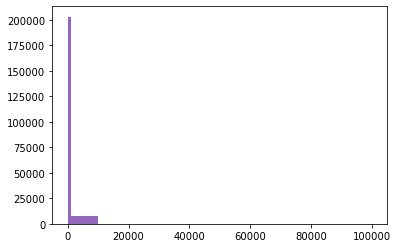

In [11]:
bin_count = 1, 10, 100,1000,10000,100000


# plt.hist(df['loan_amount'], bins=50);
plt.hist(df_2015['loan_amount'], bins=bin_count);
plt.hist(df_2016['loan_amount'], bins=bin_count);
plt.hist(df_2017['loan_amount'], bins=bin_count);
plt.hist(df_2018['loan_amount'], bins=bin_count);
plt.hist(df_2019['loan_amount'], bins=bin_count);

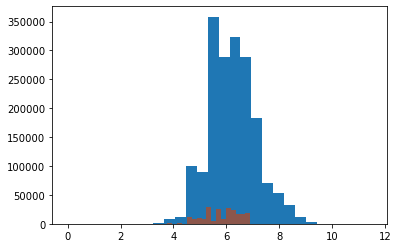

In [12]:
bin_count = 20


# plt.hist(df['loan_amount'], bins=50);
plt.hist(df_1['log_amount'], bins=bin_count);
plt.hist(df_2015['log_amount'], bins=bin_count);
plt.hist(df_2016['log_amount'], bins=bin_count);
plt.hist(df_2017['log_amount'], bins=bin_count);
plt.hist(df_2018['log_amount'], bins=bin_count);
plt.hist(df_2019['log_amount'], bins=bin_count);

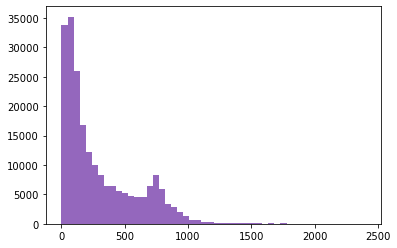

In [13]:
bin_count = 50

plt.hist(df_2015['hours_to_fund'], bins=bin_count);
plt.hist(df_2016['hours_to_fund'], bins=bin_count);
plt.hist(df_2017['hours_to_fund'], bins=bin_count);
plt.hist(df_2018['hours_to_fund'], bins=bin_count);
plt.hist(df_2019['hours_to_fund'], bins=bin_count);


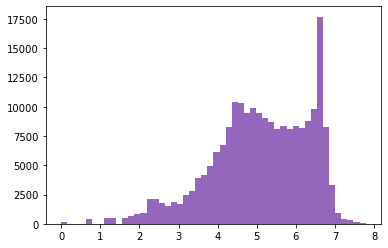

In [14]:
bin_count = 50


plt.hist(df_2015['log_htf'], bins=bin_count);
plt.hist(df_2016['log_htf'], bins=bin_count);
plt.hist(df_2017['log_htf'], bins=bin_count);
plt.hist(df_2018['log_htf'], bins=bin_count);
plt.hist(df_2019['log_htf'], bins=bin_count);

In [15]:
df_2=df_1.drop(columns=['loan_amount', 'time_to_fund', 'log_htf', 'hours_to_fund', 'loan_year']).copy()
features = df_2.columns 
features

Index(['log_amount', 'activity_name_Agriculture',
       'activity_name_Air Conditioning', 'activity_name_Animal Sales',
       'activity_name_Aquaculture', 'activity_name_Arts',
       'activity_name_Auto Repair', 'activity_name_Bakery',
       'activity_name_Balut-Making', 'activity_name_Barber Shop',
       ...
       'country_name_Turkey', 'country_name_Uganda', 'country_name_Ukraine',
       'country_name_United States', 'country_name_Vietnam',
       'country_name_Yemen', 'country_name_Zambia', 'country_name_Zimbabwe',
       'borrower_genders_G', 'borrower_genders_M'],
      dtype='object', length=252)

In [16]:
feature_cypher=df_2.isnull().sum()

feature_cypher.to_excel("feature_cypher.xlsx") 
# print(feature_cypher)

### Identify time period for transactions

In [17]:
df=df_all

### Configure model

In [18]:
X = df[features]
y = df['log_htf']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [19]:
X.head()

,log_amount,activity_name_Agriculture,activity_name_Air Conditioning,activity_name_Animal Sales,activity_name_Aquaculture,activity_name_Arts,activity_name_Auto Repair,activity_name_Bakery,activity_name_Balut-Making,activity_name_Barber Shop,...,country_name_Turkey,country_name_Uganda,country_name_Ukraine,country_name_United States,country_name_Vietnam,country_name_Yemen,country_name_Zambia,country_name_Zimbabwe,borrower_genders_G,borrower_genders_M
0,5.164786,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.991465,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5.010635,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6.652863,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,6.802395,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### OLS
#### https://www.geeksforgeeks.org/python-decision-tree-regression-using-sklearn/

In [20]:
# corr = df_2019.corr()
# mask = np.triu(np.ones_like(corr, dtype=bool))
# sns.heatmap(df_2019.corr(),
#             mask=mask,
#             annot=True,
#             cmap='coolwarm',
#             vmin=-1,
#             vmax=1)

In [21]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))


0.16477613442907169
0.16386708801359018


In [22]:
cross_val_score(lr, X_train, y_train, cv=5)

array([0.1651716 , 0.16723975, 0.16422103, 0.16385954, 0.16147546])

296.599262643254


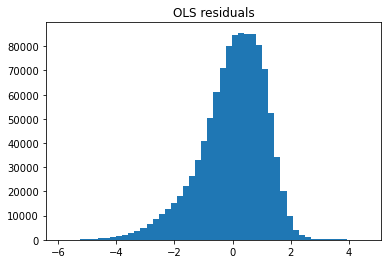

In [23]:
y_train_preds = lr.predict(X_train)
resids = y_train - y_train_preds

lr_train_mse = mean_squared_error(np.exp(y_train), np.exp(y_train_preds))
lr_train_rmse = np.sqrt(lr_train_mse)

plt.hist(resids, bins=50);
plt.title('OLS residuals')

print(lr_train_rmse)

297.71996316953954


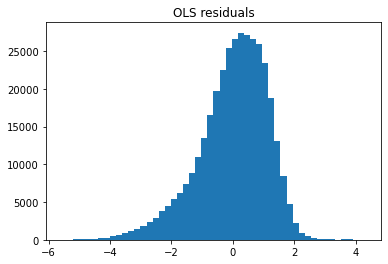

In [24]:
y_test_preds = lr.predict(X_test)
resids = y_test - y_test_preds

lr_test_mse = mean_squared_error(np.exp(y_test), np.exp(y_test_preds))
lr_test_rmse = np.sqrt(lr_test_mse)

plt.hist(resids, bins=50);
plt.title('OLS residuals')

print(lr_test_rmse)

In [26]:
lr.intercept_

-0.3378112146119845

In [27]:
print(list(zip(lr.coef_, features)))

[(0.5477887903039876, 'log_amount'), (1.1346215831914626, 'activity_name_Agriculture'), (0.6578456884500423, 'activity_name_Air Conditioning'), (1.1557740943310946, 'activity_name_Animal Sales'), (0.9250748755379266, 'activity_name_Aquaculture'), (0.7751329484072987, 'activity_name_Arts'), (1.0997507131508468, 'activity_name_Auto Repair'), (0.8687223432236894, 'activity_name_Bakery'), (0.933288403553762, 'activity_name_Balut-Making'), (1.1412118111759801, 'activity_name_Barber Shop'), (1.274643187211024, 'activity_name_Beauty Salon'), (0.28258663442787124, 'activity_name_Beekeeping'), (1.2726462408965413, 'activity_name_Beverages'), (0.34918762804210784, 'activity_name_Bicycle Repair'), (0.029589789700612188, 'activity_name_Bicycle Sales'), (0.44632951825912515, 'activity_name_Blacksmith'), (0.16470474783935501, 'activity_name_Bookbinding'), (0.7904573789264763, 'activity_name_Bookstore'), (0.8323344273080658, 'activity_name_Bricks'), (1.1357582630674354, 'activity_name_Butcher Shop'),